In [2]:
import os
import yerbamate
env = yerbamate.Environment()

from twitter.data.loader.spark import get_tweets_session

spark = get_tweets_session("userId", "likeCount", "retweetCount")


# distribution of users tweet count(userId)

users_distribution = spark.groupBy("userId").count()



In [6]:

# plot user tweet count distribution
users_tweet_distribution = users_distribution.toPandas()

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.hist(users_tweet_distribution["count"], bins=100)
# ax.set_xlabel("Number of tweets")
# ax.set_ylabel("Number of users")

# ax.set_title("Distribution of users tweet count")

# plt.show()
backup_df = users_tweet_distribution.copy()

FileNotFoundError: [Errno 2] No such file or directory: '/home/al/GitHub/twitter/plots/analysis/user_tweet_distribution/log_scale.png'

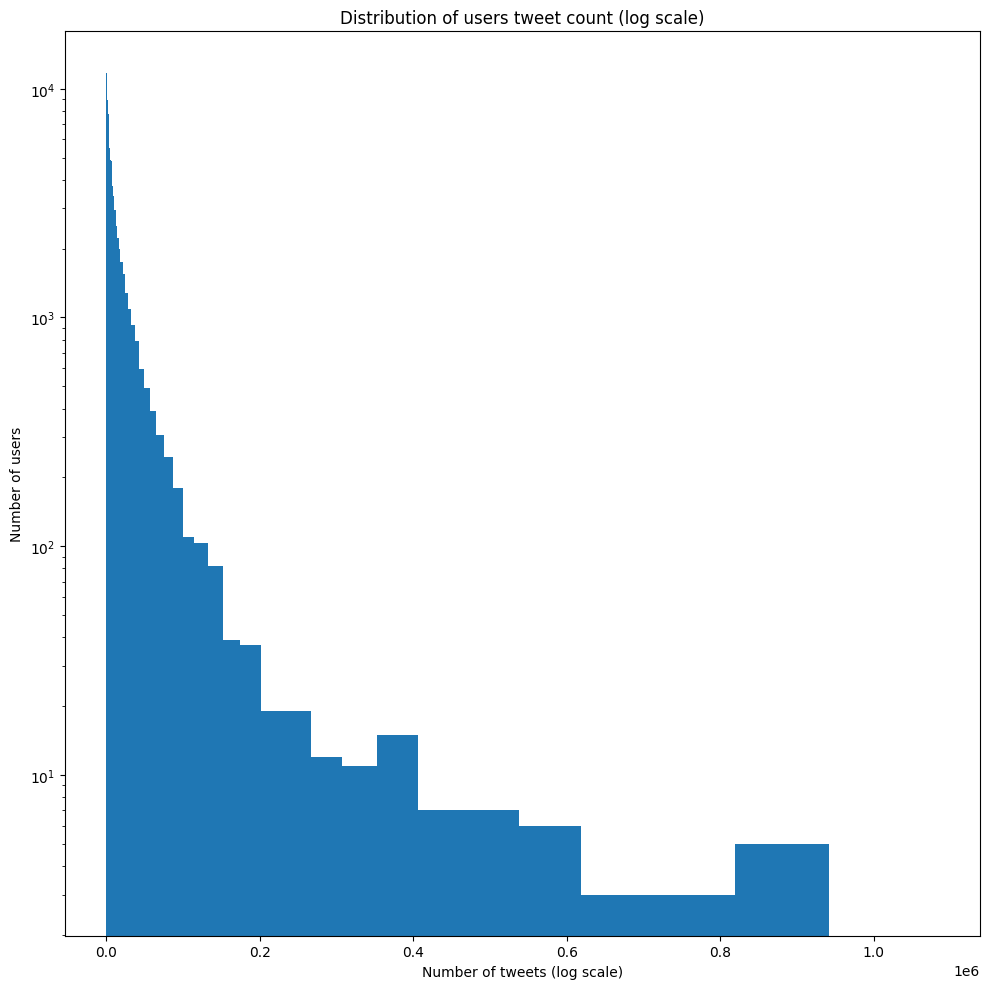

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))

# Creating logarithmically spaced bins
logbins = np.logspace(np.log10(users_tweet_distribution["count"].min()),np.log10(users_tweet_distribution["count"].max()),100)

ax.hist(users_tweet_distribution["count"], bins=logbins)
ax.set_yscale('log')
ax.set_xlabel("Number of tweets (log scale)")
ax.set_ylabel("Number of users")

ax.set_title("Distribution of users tweet count (log scale)")

save_path = os.path.join(env["plots"], "analysis", "user_tweet_distribution", "log_scale.png")

if not os.path.exists(os.path.dirname(save_path)):
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

# remove borders
plt.margins(x=0.05)

# tight layout
plt.tight_layout()

plt.savefig(save_path)

plt.show()


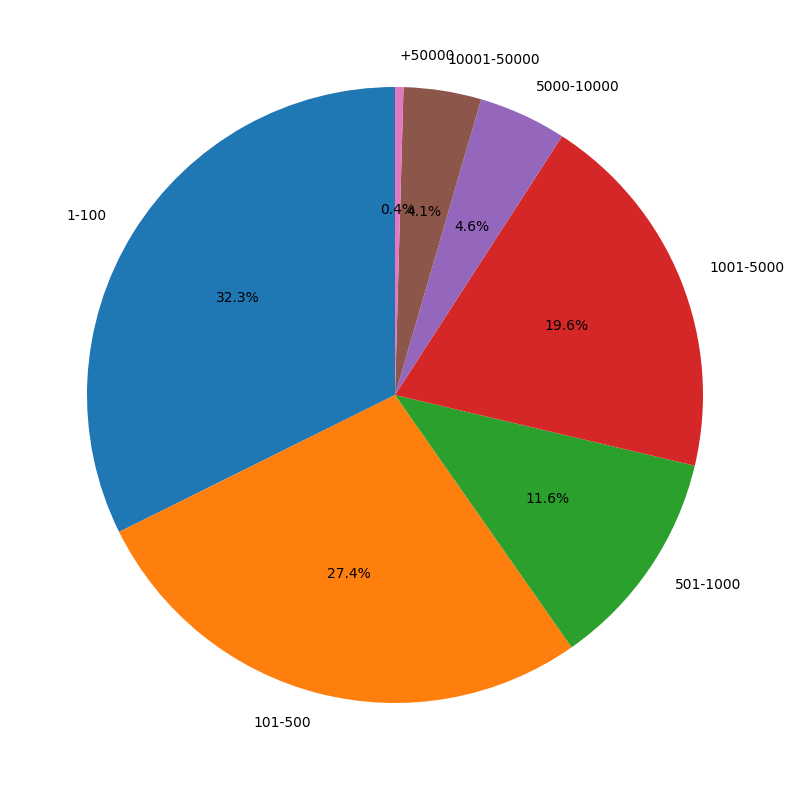

In [17]:
# pie chart of users tweet count distribution
# users_tweet_distribution
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
# create pie chart
fig, ax = plt.subplots(figsize=(10, 10))

bins = [0, 100, 500, 1000, 5000, 10000, 50000, np.inf]
# names = ['1-10', '11-20', '21-30', '31-40', '41-50', '50-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1001-5000', '5000+']
names = ['1-100', '101-500', '501-1000', '1001-5000', '5000-10000', '10001-50000', '+50000']

users_tweet_distribution['bins'] = pd.cut(backup_df['count'], bins, labels=names)

users_tweet_distribution = users_tweet_distribution.groupby('bins').count()

ax.pie(users_tweet_distribution['count'], labels=users_tweet_distribution.index, autopct='%1.1f%%', startangle=90)

save_path = os.path.join(env["plots"], "analysis", "user_tweet_distribution.png")
plt.savefig(save_path)

In [40]:
from pyspark.sql.functions import col

# First group by 'userId' and sum 'likeCount'
users_likes_sum = spark.groupBy("userId").sum("likeCount")

# Then group by 'userId' and count 'tweetId' or whatever identifier you use for individual tweets
users_tweet_count = spark.groupBy("userId").count()

# Join the two dataframes on 'userId'
users_likes_distribution = users_likes_sum.join(users_tweet_count, on='userId')

# Now, create the likeIndex column by dividing the sum of likes by the number of tweets
users_likes_distribution = users_likes_distribution.withColumn('likeIndex', col('sum(likeCount)') / col('count'))


users_likes_distribution = users_likes_distribution.toPandas()


In [45]:
users_likes_distribution.head()

,userId,sum(likeCount),count
likeIndex,,,
-0.6,1,1,1
-0.5,1,1,1
-0.4,2,2,2
-0.2,1,1,1
-0.1,7,7,7


In [43]:


# group by likeIndex (0.1 precision) names as likeCount (rename column))

# its pandas df
#users_likes_distribution = users_likes_distribution.toPandas()

# plot like count distribution

 

# round likeIndex to 0.1 precision
users_likes_distribution['likeIndex'] = users_likes_distribution['likeIndex'].round(1)

# group by likeIndex
users_likes_distribution = users_likes_distribution.groupby('likeIndex').count()

# plot likeIndex distribution as bar chart
 
# save plot
save_path = os.path.join(env["plots"], "analysis", "user_like_distribution.png")

fix, ax = plt.subplots(figsize=(10, 10))


# histogram
ax.hist(users_likes_distribution, bins=100)

ax.set_xlabel("Like index")
ax.set_ylabel("Number of users")

ax.set_title("Distribution of users like index")
plt.show()

KeyError: 'likeIndex'

In [44]:
users_likes_distribution.head()

,userId,sum(likeCount),count
likeIndex,,,
-0.6,1,1,1
-0.5,1,1,1
-0.4,2,2,2
-0.2,1,1,1
-0.1,7,7,7
